# Lição 1 - Regressão Linear e Redes Neurais Profundas



## 1. Introdução

Este é a primeira lição de um conjunto de lições preparadas para introduzir e auxiliar no aprendizado das técnicas de Machine Learning.

Neste primeiro momento traremos os conceitos iniciais de redes neurais (umas das principais técnicas de Machine Learning) e ao final aplicaremos tal técnica em um problema de regressão linear, ou seja, traçar a curva que mais se aproxima dos dados do problema.

### 1.1 Índice <a class="anchor" name="section_1.1"></a>

* [1. Introdução](#section_1)
    * [1.1 Índice](#section_1.1)
    * [1.2 O que é Machine Learning/Deep Learnig](#section_1.2)

* [2. Fundamentos de redes neurais](#section_2)
    * [2.1 Processo de aprendizagem (feedforward e backpropagation)](#section_2.1)
    * [2.2 Conjunto de Equações](#section_2.2)
    * [2.3 Overfitting/Underfitting](#section_2.3)
    * [2.4 Treinamento, validação e teste](#section_2.3)

* [3. Regressão Linear de uma variável](#section_3)
    * [3.1 Plotando os dados](#section_3.1)
    * [3.2 Gradient Descent](#section_3.2)
      * [Atualização das equações](#section_3.2.1)
      * [Implementação](#section_3.2.2)
      * [Cálculo do custo $J(\theta)$](#section_3.2.3)
      * [Gradient Descent](#section_3.2.4)
    * [3.3 Tradução automática](#section_3.3)
    * [3.4 Visualizando $J(\theta)$](#section_3.4)

* [4. DNN para Regressão Linear](#section_5)
    * [4.1 Criação do modelo](#section_5.1)
    * [4.2 Processamento e tratamento dos dados de entrada](#section_5.2)
    * [4.3 Treinamento da Rede Neural](#section_5.3)

* [5. Sugestões](#section_6)

* [6. Referências](#section_7)
    

### 1.2 O que é Machine Learning/Deep Learnig<a class="anchor" name="section_1.2"></a>

 

O mundo da Inteligência Artificial (IA) se dá pela busca de que máquinas se baseiem nos processos de tomada de decisão do ser humano para se condicionar a atuação das mesmas. Dentre deste enorme campo de estudo temos o aprendizado de máquina, do inglês Machine Learning (ML), que são um conjunto de técnicas que se tem como finalidade a automação das ações tomadas pela máquina com base nas experiências apresentadas, ou seja, tais técnicas se firmam no processo de treinamento prévio das situações possíveis para que o modelo responda de acordo com as entradas do modelo. 

Dentre os diversos métodos de ML, como regressão linear, regressão logística, árvores de decisão, clusterização entre outras, têm-se a técnica de Redes Neurais (RN) que se inspiram no modelo conexionista dos neurônios do cérebro humano para construir modelos e se definir os pesos das conexões com base no treinamento. 

Assim, o aprendizado profundo, do inglês Deep Learning (DL), nada mais é do que a utilização de diversas (muitas) camadas ocultas entre a entrada e a saída dos dados de uma rede neural, ou seja, estamos falando na casa de centenas ou milheres de conexões.

 



## 2. Fundamentos de redes neurais<a class="anchor" name="section_2"></a>

A técnica de rede neural é uma das diversas técnicas existentes no mundo do aprendizado de máquina, ela foi inspirada na arquitetura do cérebro humano e nas conexões entre neurônios que ali existem, daí a denotação conexionista. 

De maneira geral, um neurônio é formado por sinais de entrada x, cada entrada é ponderada por um peso w, que são somados para gerar o resultado. A essa soma adicionamos um limiar de ativação (da rede Perceptron) ou mais comumente conhecido com bias, aqui representado por θ, e a essa saída passamos por uma função de ativação para obter y. 


 



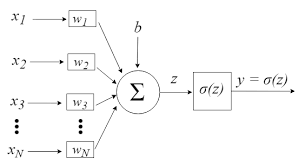

Figura 1 - Esquema de um neurônio de uma Rede Perceptron

Assim, chegamos na modelagem matemática de um neurônio: 

$$z = \sum_{i=1}^{N}(w_i*x_i)+ b$$

$$y = \sigma(z) = \sigma(\sum_{i=1}^{N}(w_i*x_i)+ b) $$

Em que $y$ representa a saída do neurônio, $x$ a(s) entrada(s) do neurônio que será(ão) somada(s) de acordo com o(s) peso(s) $w$ e o bias, que é representado por $θ$ ou $b$ ressalta-se também que é encontrado na literatura as seguintes representações para essa soma ponderada das entradas, o $z$ ou $h_w(.)$. A esta soma passamos por uma função de ativação, que na literatura é representada pela função $g(.)$ ou $σ(.)$.  

Veja que o processo de se somar de forma ponderada as entradas é linear, enquanto o bias serve para ajuste fino dessa soma, e é aí que entra a função de ativação, é ela quem vai adicionar ao sistema a capacidade de se poder mapear não-linearidades. Em geral, a função de ativação visa limitar entre 0 e 1 ou -1 e 1 a saída do neurônio, uma vez que a soma ponderada das entradas pode tender a infinito (ou a menos infinito), e nisto (esse processo não-linear) faz com que a saída do neurônio seja não-linear. 



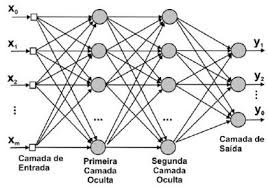

Figura 2 - Rede Neural

Ao conjunto de neurônios chamamos rede neural, como visto na Figura 2 cada círculo (exceto os círculos referentes aos dados de entrada, saída e do espaço latente) representam um neurônio neste modelo esquemático, em que para cada um se tem uma entrada e gera-se uma saída. Vale-se ressaltar que todos os sinais de entrada são as entradas de cada neurônio, enquanto que a saída de cada neurônio está na entrada de todos os neurônios da camada seguinte, a essa estrutura chamamos de rede neural completamente conectada (todos os nós se conectam), de forma análoga existem estruturas de rede neural parcialmente conectadas. Assim, chegamos no conceito de camadas escondidas (do inglês hidden layers), cada coluna na imagem é chamada de camada e todas as camadas entre os sinais de entrada e saída são ocultas, observa-se que quanto mais camadas internas temos mais complexo é nossa arquitetura, para tais tipos de arquiteturas temos as técnicas de aprendizado de profundo (o deep machine learning). 

Um ponto importante é que na modelagem de qualquer problema de machine learning em geral têm-se os dados de entrada $x$, os dados desejados $y$ e se quer encontrar (para uma dada função de ativação conhecida) os valores ótimos $w$ e $θ$. Ou seja, temos aí um problema de otimização! A partir de um chute inicial (que é aleatório) quer-se encontrar os melhores valores para os pesos de tal maneira que se possa modelar a saída $y$ pelas entradas $x$. 

Para problemas em que se conhece os dados desejados de saída para um conjunto de dados de entrada temos o chamado **aprendizado supervisionado**, ou seja, podemos encontrar os valores ótimos dos pesos e do bias por meio desses dados. E é neste processo de aprendizado que chegamos a outro termo chave desta área, o **treinamento**, processo pelo qual a rede neural irá passar para encontrar tais valores. 

### 2.1 Processo de aprendizagem (feedforward e backpropagation)<a class="anchor" name="section_2.1"></a>

 

O treinamento é feito de forma iterativa em que para cada iteração calcula-se o erro ou o custo para os valores de $w$ e $θ$ utilizados. Para isso define-se a função de custo ou função de erro em que tal função visa mensurar o quão distante (ou o quão diferente) está a saída estimada da saída deseja $y$. A ideia é minimizar a função de custo, assim há algoritmos específicos para se fazer a atualização dos pesos $w$, de modo, que se quer custo (ou erro) zero entre a saída estimada pela rede e a saída desejada em cada iteração do treinamento, para isso utiliza-se bastante da operação de derivação (daí encontramos outra restrição fundamental para a nossa função de ativação, ela precisa ser derivável!). 

Recapitulando, queremos encontrar os valores ótimos de $w$ e $θ$ para uma determinada arquitetura de rede neural que modele bem a relação entre os dados de entrada $x$ e $y$. Para isso utiliza-se de um conjunto de dados conhecidos de $x$ e $y$ (comumente conhecido de **dataset de treinamento**) no processo de treinamento, que por sua vez, é um processo iterativo que é metrificado por uma função de custo até que a rede convirja, ou seja, chegue a valores aceitáveis de erro para determinados valores de $w$ e $θ$. 

Assim, durante o treinamento define-se os processos de **feedforward** e **backpropagation**. Em que o primeiro é o de "ida", em que se coloca um conjunto de dados de treinamento na entrada da rede neural, que para pesos aleatórios, irão ser multiplicados e somados, de modo a gerar um valor que será aplicado à função de ativação escolhida e por consequência gerará um valor de $y$ que será comparado com o valor esperado, que é conhecido, pela função de custo (quanto maior o custo/erro, mais longe do ideal a rede neural está).

Com base no valor resultante da função de custo, roda-se um processo de atualização dos pesos da rede neural, tal técnica se baseia na derivação da função de custo escolhida e ela representa a "volta", ou seja, do fim (do resultado incialmente encontrado) da rede neural até o seu inicío, o que chamamos de **backpropagation**.

A este processo de atualização dos pesos com base em um conjunto de dados de entrada e saída conhecidos chamamos de treinamento de uma rede neural supervisionada (logo, a atualziação dos pesos está condicionada às saídas esperadas). De modo que este processo é fundamental para a **convergência** da rede, em que se objetiva que a cada atualização dos pesos o erro diminua, fazendo com que a rede tenha uma taxa de acerto ideal (ou que a curva gerada se aproxime o máximo da real).
 



### 2.2 Conjunto de Equações<a class="anchor" name="section_2.2"></a>

Para ilustrar (para quem gosta) dos processos matemáticos envolvidos na rede neural, apresentaremos agora um conjunto de equações que modelam os conceitos que apresentamos anteriormente.

Primeiro, definimos como saída da rede a função $h_w(.)$,

$$h_w(x) =  \sum_{i=1}^{N}(w_i*x_i)+ b$$

Tal resultado passará pela função de ativação escolhida e resultará na saída,

$$y = g(h_w(x)) =  g(z)$$

Lembrando que a função sigmoid, também representada por $\sigma(.)$, é definida:

$$g(z) = \frac{1}{1+e^{-z}}$$

Alguns exemplos de funções de ativação
*   Função Sigmoid
*   Função ReLU
*   Função tanh


O objetivo é sempre minimizar a diferença entre o valor esperado, $y$, e o valor gerado pela rede $y'$. Assim, temos uma definição de função de custo $J(w)$, em que $N$ representa o tamanho do dataset de treino, ou seja, a quantidade de amostras disponíveis para treino:

$$ J(w) = \frac{1}{2N} \sum_{i=1}^N \left( h_{w}(x^{(i)}) - y^{(i)}\right)^2$$

Utilizamos, em geral, este modelo para problemas de regressão, também conhecida como função MSE (Mean Square Error), erro médio quadrático, em que pegamos a média da diferença das saídas ao quadrado. Outra técnica de Machine Learning é a Regrassão Logística, em que está (em geral para problemas em que se quer classificar os dados de entrada) utiliza-se a função de Cross-Entropy, entropia cruzada, em que se pega a média do produto da saída pelo log da saída menos o produto de um menos a saída e o log desta diferença, definida como:

$$ J(w) = \frac{1}{N} \sum_{i=1}^{N} \left[ -y^{(i)} \log\left(h_w\left( x^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h_w\left( x^{(i)} \right) \right) \right]$$

Como já dito anteriormente os valores da saída da função custo são importantes uma vez que através deles podemos perceber o quão distante está o modelo de rede neural proposto entre os dados reais. A função de custo é chave, uma vez que queremos otimiza-la (que o seu valor tenda a zero) e ela possi como paramêtro $h_w$, que envolve os os pesos $w_i$, aqueles que queremos encontrar para chegar no modelo ótimo e que a rede convirja.

Para tanto, utilizamos uma das técnicas de otimização mais conhecida, o *gradient descendent*, em português a descida do gradiente, uma técncia baseada na derivação da função de custo, o gradiente do custo. O gradiente do custo é um vetor com o mesmo tamanho do vetor de pesos $w$ em que o $j$-ésimo elemento (para $j = 0, 1, \cdots , N$) é definido como:

$$ \frac{\partial J(w)}{\partial w_j} = \frac{1}{N} \sum_{i=1}^N \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} $$

Com este gradiente, podemos atualizar os pesos $w$ ponderados por uma taxa $\alpha$, conhcedida como **leraning rate**, ou taxa de aprendizagem. Este paramêtro pondera o impacto com que o gradiente terá na atualização dos pesos, como visto:

$$ w_j = w_j - \alpha \frac{\partial J(w)}{\partial w_j}$$

Em resumo, temos o seguinte equacionamento referente às atualizações dos pesos no *backpropagation*:

$$ w_j = w_j - \alpha \frac{1}{N} \sum_{i=1}^N \left( h_w(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{atualização simultânea de } w_j \text{ para todo } j$$




### 2.3 Overfitting/Underfitting<a class="anchor" name="section_2.3"></a>

Já vimos que o intuito dos modelos de Machine Learning é generalizar da melhor forma os nossos dados, de forma a resultar em saídas condizentes com as entradas que não foram vistas pelo modelo enquanto ele aprendia. A generalização é importante porque os dados que coletamos para treinamento são apenas uma amostra do gigantesco universo de dados que o modelo possivelmente vai receber. Fica fácil afirmar, então, que o desempenho de um modelo está diretamente ligado à capacidade de generalização do mesmo. Logo, para avaliar um modelo, é preciso acrescentar mais uma técnica de avaliação de modelos: os conceitos de **overfitting** e **underfitting**, que em tradução livre, seriam o sobreajuste e subajuste, respectivamente.  

O **overfitting** ocorre quando um modelo consegue modelar muito bem, de forma quase perfeita, os dados de treinamento. Mas você pode se perguntar, por que isso seria um problema?! Quando um modelo possui esse sobreajuste, ele acaba aprendendo também os ruídos dos dados de entrada, o que impacta de forma negativa no seu desempenho e por consequência na sua generalização. O modelo vai começar a aprender por meio de detalhes dos dados que não deveriam influenciar na saída, o que fará com que as entradas desconhecidas sejam classificadas de forma incorreta.   

Essa característica acontece quando o algoritmo final usado para construir o modelo é muito complexo e no final ele vai encaixar bem os dados, mas vai falhar na hora de classificar novos dados. Esse modelo provavelmente vai ser uma rede neural altamente complexa com várias camadas e pesos além do necessário. Nesse caso o erro nos dados de treinamento vai ser quase nulo, pois o modelo aprender “até demais” e modela todos os padrões, mesmo aqueles que você não desejava que fossem considerados. Mas na hora dos dados de testes, o erro vai aumentar pois a distribuição de dados pode ser muito diferente do treinado. 

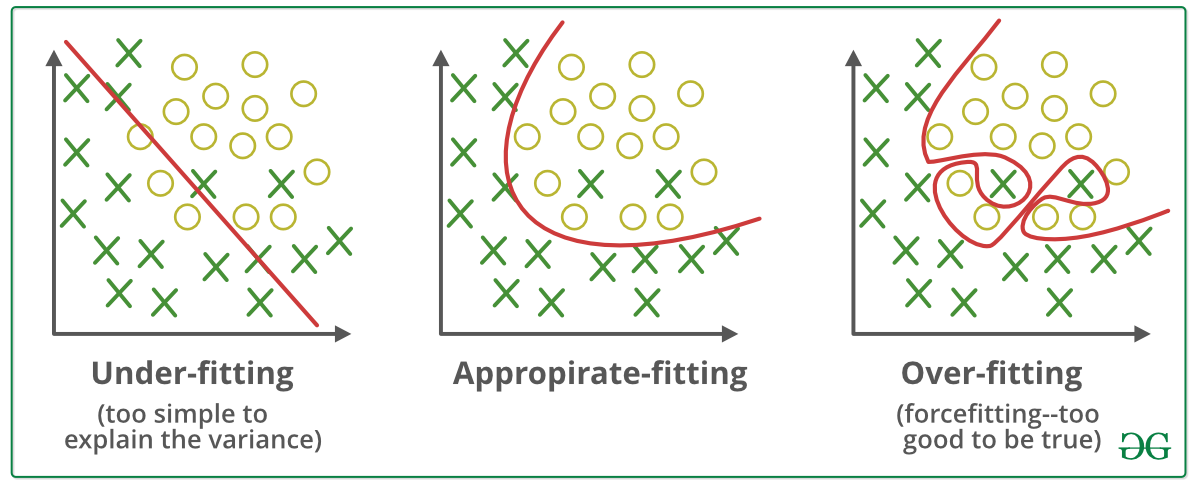

Figura 3 - [Subjustting e Overfitting em Machine Learning - GeeksforGeeks](https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/) {style=text-align:center}



Já o **underfitting** acontece quando o modelo não “aprende” muito com os dados de treinamento e acaba não capturando a tendência dominante do dataset. Ele não consegue modelar os dados de treinamento de forma precisa e também não generaliza para os novos dados de teste e, por fim, acaba nos devolvendo previsões nem um pouco confiáveis.   

Essa característica ocorre quando o modelo/algoritmo não se encaixa suficientemente bem nos nossos dados. Geralmente é quando tentamos linearizar dados que estão distribuídos de forma mais complexa, sendo a linear uma solução simples demais pro nosso problema. O problema de ter um modelo underfitting é claro e sua solução está no incremento da complexidade do modelo, e as formas de se fazer isso são variadas.   

Tudo bem, mas como eu consigo determinar se o meu modelo está sobreajustando ou subajustando?! E como eu faço para encontrar o famoso ponto ideal entre essas características?! É aí que entram os conceitos de **treinamento**, **validação** e **teste**.  

### 2.4 Treinamento, validação e teste.<a class="anchor" name="section_2.4"></a>

Precisamos de um dataset para treinar a rede, isso a gente já sabe, mas na hora de testar e validar a qualidade do nosso modelo, não faz sentido usar esse mesmo dataset, já que o modelo aprendeu por ele, certo?! Afinal, se usarmos os dados que ajudaram a construir o modelo como teste, não poderemos generalizar o resultado para o ambiente externo ao modelo. Por isso fazemos uma divisão do dataset original, para que cada parte tenha um propósito definido. 

  

Usualmente, nós dividimos o dataset original em três conjuntos: o de treinamento, que indiscutivelmente deve ser o maior, o de validação e o de teste. A porcentagem de dados que cada um vai herdar do dataset original pode variar de acordo com as suas necessidades. Aconselha-se sempre realizar testes com diferentes porcentagens para o conjunto de treinamento e dividir o resto entre validação e teste, caso você opte por fazer a validação e o teste.  

  

O conjunto de treinamento já sabemos para que serve, é o conjunto de dados que a gente usa propriamente para treinar o modelo, é pelos dados dele que o modelo consegue aprender, mas e os outros conjuntos?! 

  

O **conjunto de validação** é a amostra de dados novos (ainda não vistos pelo modelo) que utilizamos para fazer os primeiros testes no modelo ainda durante o treinamento. Ele servirá para termos uma noção inicial como o nosso modelo está respondendo com os novos dados. É com a validação que conseguimos olhar para o nosso modelo e selecionar a melhor abordagem de desempenho.  

Ele é usado para dar uma estimativa imparcial da habilidade do modelo final ao comparar ou selecionar entre os modelos finais. Podemos utilizar desse dataset para criar alguns critérios para ajustar os hiperparâmetros do classificador. Por exemplo, podemos usar o conjunto de validação para encontrar o número otimizado de camadas ocultas do DL. Ou podemos usar algum critério de parada de treinamento ao analisar o dataset de validação, para que o treinamento pare quando a acurácia estabilizar em determinada margem de segurança. As formas de se utilizar esse conjunto são vastas e vão variar de acordo com as suas necessidades de projeto.  

  

Já o **conjunto de teste** é a amostra de dados utilizada para fornecer uma avaliação imparcial de um modelo final encaixado no conjunto de dados de treinamento. Diferentemente do conjunto de validação, o conjunto de teste só é usado quando um modelo é completamente treinado, para avaliação final da qualidade do modelo. É um conjunto que necessariamente contém dados cuidadosamente amostrados que abrangem as várias classes que o modelo enfrentaria, quando usado no mundo real. Além disso, como ele é um dataset utilizado apenas após o treinamento ser finalizado, podemos utilizá-lo para estimar a taxa de erro final do modelo. 



![image.png](https://i.stack.imgur.com/osBuF.png)

Figura 4 - [Training set, validation set and test set](https://datascience.stackexchange.com/questions/52632/cross-validation-vs-train-validate-test)



Lembrando que é de suma importância criar todos os conjuntos de dados de forma aleatória do dataset original, afinal, precisamos simular cenários reais para obter resultados mais satisfatórios.  

## 3. Regressão Linear de uma variável<a class="anchor" name="section_3"></a>

Agora nós iremos implementar a regressão linear para uma variável para tentar prever os lucros de um food truck. Suponha que você é o CEO de uma franquia de food trucks e está considerando diferentes cidades para abrir uma nova filial. A franquia já possui outros trucks em várias cidades e você possui os dados de rentabilidade de cada um deles, além da população de cada um desses municípios. Você planeja utilizar esses dados para escolher qual será a cidade escolhida para abrir o próximo truck.

O documento `Data/ex1data1.txt` contém um dataset para o nosso problema de regressão. A primeira coluna é a população da cidade (em 10 mil habitantes) e a segunda coluna é o lucro do food truck nesta cidade (em 10 mil dólares). Um valor negativo para o lucro significa um prejuízo.

Nós já fornecemos o código para carregar esses dados. O dataset será carregado e guardado nas variáveis `X` e `y`:

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces
%matplotlib inline

In [2]:
'''
Leitura do dataset
'''

# Importação dos dados do arquivo .txt e separação de variáveis
data = np.loadtxt('Data/ex1data1.txt', delimiter=',') 
X, y = data[:, 0], data[:, 1]

m = y.size  #Número de exemplos de treinamento

### 3.1 Plotando os dados<a class="anchor" name="section_3.1"></a>

Antes de qualquer coisa, é sempre interessante que nós visualizemos os dados. Para este dataset, nós podemos usar um gráfico de dispersão (scatter plot) para visualizar os dados, desde que eles só possuam duas features (lucro e população). 

Utilizaremos a biblioteca `matplotlib` para as plotagens. O `pyplot` é um módulo desta biblioteca que disponibiliza uma interface simplificada para as plotagens mais usadas do `matplotlib`, imitando a interface de plotagem do MATLAB. 

In [3]:
def plotData(X, y):
    '''
    Função de plotagem dos exemplos de treinamento.

    Parâmetros:
    -----------
    X: {list ou np.array}
        Lista com os exemplos do dataset.
    y: {list ou np.array}
        Lista com os rótulos do dataset.
    '''    
    fig = plt.figure()  #Inicializa uma nova figura
    
    plt.plot(X, y, 'ro', ms=10, mec='k') #Faz a plotagem
    # Modifica o rótulo dos dois eixos do gráfico
    plt.ylabel('Lucro em $10,000')
    plt.xlabel('População da cidade em 10 mil habitantes')

Agora vamos rodar a função com os dados carregados para visualizá-los. 


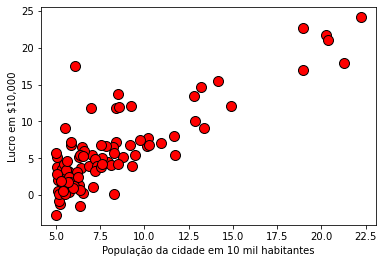

In [4]:
plotData(X, y)

### 3.2 Gradient Descent<a class="anchor" name="section_3.2"></a>

Nesta parte, nós iremos ajustar os parâmetros $w$ da regressão linear do nosso dataset utilizando a técnica denominada *gradient descent*. Essa técnica consiste em um algoritmo de otimização iterativo de primeira ordem utilizado para encontrar o mínimo de uma função. Para um estudo da técnica que utilizaremos nos próximos passos, aconselha-se o leitura dos seguintes links:
* [Gradient Descent: An Introduction to 1 of Machine Learning’s Most Popular Algorithms](https://builtin.com/data-science/gradient-descent)
* [How Does the Gradient Descent Algorithm Work in Machine Learning?](https://www.analyticsvidhya.com/blog/2020/10/how-does-the-gradient-descent-algorithm-work-in-machine-learning/)

A leitura auxiliará no compreendemento das equações aqui utilizadas.

#### 3.2.1 Atualização das equações<a class="anchor" name="section_2.2.1"></a>

O objetivo da regressão linear é minimizar a função de custo

$$ J(w) = \frac{1}{2N} \sum_{i=1}^N \left( h_{w}(x^{(i)}) - y^{(i)}\right)^2$$

em que a hipótese $h_w(x)$ é dada pelo modelo linear

$$ h_w(x) = w^Tx = w_0 + w_1 x_1$$

Repare que os parâmetros do nosso modelo são os valores de $w_j$. Esses valores devem ser ajustados para minimizar a função de custo $J(w)$. Uma forma de fazer isso é usar o método *gradient descent* em *batches* de dados. Mas o que que isso significa?! O **batche gradient descent** é um tipo de gradient descent que calcula o erro para cada exemplo dentro do conjunto de dados de treinamento, mas somente depois de todos os exemplos de treinamento terem sido avaliados é que o modelo é atualizado. Uma iteração do algoritmo é chamada de um "batch", ou em tradução livre, um "lote".

Nesta técnica, cada iteração realiza uma atualização

$$ w_j = w_j - \alpha \frac{1}{N} \sum_{i=1}^N \left( h_w(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{atualização simultânea de } w_j \text{ para todo } j$$

A cada iteração do método, o parâmetro $w_j$ se aproxima dos valores ótimos, ou seja, aqueles nos quais a função de custo $J(w)$ será minimizada.

<div class="alert alert-block alert-warning">
**Nota de implementação:** Nós guardamos cada exemplo em uma linha da matriz $X$ em Python `numpy`. Para levar em conta o termo de interceptação ($w_0$), nós adicionaremos uma primeira coluna "extra" em $X$, em que todos elementos serão iguais a '1'. Isso permitirá tratar $w_0$ como outra simples feature.    
</div>


#### 3.2.2 Implementação<a class="anchor" name="section_2.2.2"></a>

Nós já possuímos os dados para a regressão linear. Na próxima célula, nós adicionaremos outra dimensão aos nossos dados para acomodar o termo de interceptação $w_0$. NÃO execute essa célula mais de uma vez.

In [5]:
# Adiciona uma coluna de uns aos exemplos de treinamento, que serão multiplicados por theta0
X = np.stack([np.ones(m), X], axis=1)

Além disso, implementaremos a função sigmoid.

In [6]:
def sigmoid(z):
  '''
  Executa a função sigmoid.

  Parâmetros:
  -----------
  z: {int, float ou np.array}
    Entrada que será passada pela função sigmoid.
  '''

  return 1 / (1 + np.exp(-z))

<a id="section2"></a>
#### 3.2.3 Cálculo do custo $J(w)$<a class="anchor" name="section_3.2.3"></a>

Quando utilizamos o método *gradient descent* para minimizar a função de custo $J(w)$, é interessante monitorar a sua convergência, isto é, o valor do custo ao longo das iterações. Nesta seção, nós implementaremos a função que calcula $J(w)$, permitindo o acompanhamento da convergência da nossa implementação.

A próxima célula é completar o código da função `computeCost`, que calcula $J(w)$. Lembre que $X$ e $y$ não são valores escalares. $X$ é uma matriz (e por isso é representado em letra maiúscula), com N linhas representando os exemplos do dados de treinamento (*training set*) e $y$ é um vetor (e por isso é representado em letra minúscula) em que cada elemento representa a saída desejada para cada um dos exemplos de treinamento de $X$.
<a id="computeCost"></a>

In [7]:
def computeCost(X, y, w):
    '''
    Função que calcula o custo.
    
    Parâmetros:
    ----------
    X: {np.array}
        Array contendo os exemplos do dataset.
    y: {np.array}
        Array contendo os rótulos do dataset.   
    w: {np.array}
        Parâmetros da regressão linear.
    
    Outputs:
    --------
    J: {float}
        Valor do custo da regressão linear.
    '''
    m = y.size  #Número de exemplos de treinamento
        
    h = X.dot(w) #Cálculo da hipótese    
    J = 1/(2*m)*np.sum(np.square(h-y))  #Cálculo do custo
    return J

Uma vez que a função esteja completa, o próximo passo é rodar `computeCost` duas vezes utilizando duas diferentes inicializações de $w$. Você terá o custo printado na sua tela. 

In [8]:
J = computeCost(X, y, w=np.array([0.0, 0.0]))
print('Com w = [0, 0] \nCusto calculado = %.2f' % J)
print('Valor de custo esperado (aproximado) 32.07\n')

J = computeCost(X, y, w=np.array([-1, 2]))
print('Com w = [-1, 2]\nCusto calculado = %.2f' % J)
print('Valor de custo esperado (aproximado) 54.24')

Com w = [0, 0] 
Custo calculado = 32.07
Valor de custo esperado (aproximado) 32.07

Com w = [-1, 2]
Custo calculado = 54.24
Valor de custo esperado (aproximado) 54.24


<a id="section3"></a>
#### 3.2.4 Gradient Descent<a class="anchor" name="section_3.2.4"></a>

A seguir, nós completaremos a função que implementa o gradient descent. A estrutura do loop do algoritmo pode ser verificada, com a atualização de $w$ em cada iteração.

Enquanto roda o algoritmo, certifique-se de que está entendendo o que está sendo otimizado e o que está sendo feito para isto. Tenha em mente que o custo $J(w)$ é parametrizado pelo vetor $w$, e não por $X$ e $y$. Isto é, nós minimizaremos o valor de $J(w)$ através das mudanças nos valores de $w$, e não pelas mudanças nos valores de $X$ ou $y$.

Uma boa maneira de verificar o funcionamento do método *gradient descent* é monitorar o valor de $J(w)$ e verificar que ele decresce a cada iteração. Caso deseje ver o funcionamento na pratica, imprima os valores de $J(w)$ ao final.

O início da função `gradientDescent` chama `computeCost` em cada iteração e salva o custo em uma lista `python`. Assumindo que nós implementamos estas duas funções corretamente, o valor para $J(w)$ não deve aumentar nunca, convergindo para um valor fixo ao final do algoritmo.

In [9]:
def gradientDescent(X, y, w, alpha, num_iters):
    '''
    Função que executa a descida do gradiente.
    
    Parâmetros:
    ----------
    X: {np.array}
        Array contendo os exemplos do dataset.
    y: {np.array}
        Array contendo os rótulos do dataset.   
    w: {np.array}
        Parâmetros da regressão linear.
    alpha: {float}
        Taxa de aprendizagem (learning rate).
    num_iters: {float}
        Número de iterações da regressão linear.

    Outputs:
    --------
    w: {float}
        Parâmetros da regressão linear otimizados.
    J_history: {list}
        Lista com o custo calculado em cada iteração do algoritmo.
    '''
    m = y.shape[0]  #Número de exemplos de treinamento
    dim = w.shape[0] #Número de parâmetros
    # Cria uma cópia de w para evitar modificar o array original
    w = w.copy()
    
    J_history = [] #Cria a lista que guardará o custo de cada iteração
    
    for i in range(num_iters):
        h = X.dot(w) #Cálculo da hipótese
        w = w - alpha*(1/m)*(X.T.dot(h-y)) #Otimização de theta
         
        # Guarda o custo da iteração
        J_history.append(computeCost(X, y, w))
    
    return w, J_history

Depois de finalizar, nós chamaremos a função implementada `gradientDescent` e vamos printar o $w$ calculado. Nós inicializaremos os parâmetros $w$ como 0 e a taxa de aprendizado (learning rate) $\alpha$ como 0,01. Execute a próxima célula para conferir o código.

In [10]:
# Inicialização dos parâmetros
w = np.zeros(2)

# Configuração do processo de descida do gradiente
iterations = 1500
alpha = 0.01

w, J_history = gradientDescent(X ,y, w, alpha, iterations)
print('Theta encontrado com o gradient descent: {:.4f}, {:.4f}'.format(*w))
print('Valores esperados de w (aproximado): [-3.6303, 1.1664]')

Theta encontrado com o gradient descent: -3.6303, 1.1664
Valores esperados de w (aproximado): [-3.6303, 1.1664]


Nós utilizaremos os parâmetros obtidos como saída da função `gradientDescent` para plotar a regressão linear. 

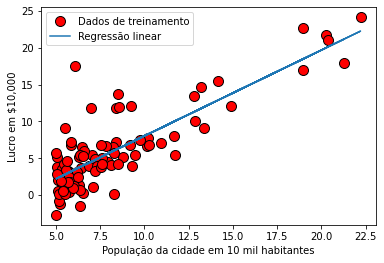

In [11]:
# Plota os dados e o resultado da regressão linear
plotData(X[:, 1], y)
plt.plot(X[:, 1], np.dot(X, w), '-')
plt.legend(['Dados de treinamento', 'Regressão linear']);

Nossos valores finais de $w$ também serão usados para fazer previsões dos lucros em áreas de 35 e 70 mil habitantes.

<div class="alert alert-block alert-success">
Note que as linhas de código seguintes utilizam produto entre matrizes, ao invés de somas em loops, para calcular as previsões. Isto é um exemplo de vetorização de código em `numpy`.
</div>

<div class="alert alert-block alert-success">
Note que o primeiro argumento da função `np.dot` é uma lista python. A biblioteca `numpy` pode converter internamente listas python em `numpy arrays` quando explicitado nos argumentos das funções `numpy`.
</div>


In [12]:
# Prevê o lucro para cidades com 35 mil e 70 mil habitantes, respectivamente.
predict1 = np.dot([1, 3.5], w)
print('Para população = 35,000, nós prevemos um lucro de {:.2f}\n'.format(predict1*10000))

predict2 = np.dot([1, 7], w)
print('Para população = 70,000, nós prevemos um lucro de {:.2f}\n'.format(predict2*10000))

Para população = 35,000, nós prevemos um lucro de 4519.77

Para população = 70,000, nós prevemos um lucro de 45342.45



### 3.4 Visualizando $J(w)$<a class="anchor" name="section_3.4"></a>

Para entender melhor a função de custo $J(w)$, nós iremos agora plotar o custo através de um gráfico tridimensional, com o custo no eixo z em função de $w_0$ e $w_1$. 

Na próxima célula, o código está construído para calcular $J(w)$ utilizando a função `computeCost`, anterioemente declarada. Depois de executar a próxima célula, o resultado será uma matriz 2-D com os valores de $J(w)$. Então, esses valores serão usados para produzir a superfície e o contorno de $J(w)$ que serão plotados usando as funções `plot_surface` e `contourf` do matplotlib. Essas plotagens devem se parecer com as imagens a seguir.

![]( https://docs.google.com/uc?export=download&id=15zq0BZipfcbdJsCAc9ZGYy-lEnPpv_JW)

O propósito desses gráficos é mostrar como $J(w)$ varia com as mudanças de $w_0$ e $w_1$. A função de custo $J(w)$ possui um mínimo global. Isto é mais fácil de ser visualizado no gráfico de contorno do que no gráfico 3-D. Este mínimo é o ponto ótimo para $w_0$ e $w_1$, e cada iteração do método *gradient descent* move os parâmetros para mais próximo deste ponto.

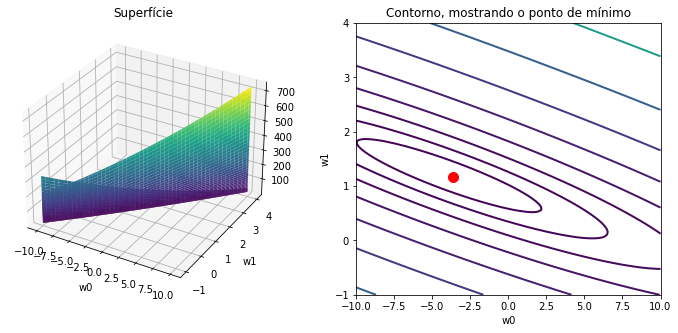

In [13]:
# Thetas que serão utilizados para medição do custo
w0_vals = np.linspace(-10, 10, 100)
w1_vals = np.linspace(-1, 4, 100)

# Inicialização da matriz que guardará os valores de custo
J_vals = np.zeros((w0_vals.shape[0], w1_vals.shape[0]))

# Preenchimento da matriz com o custo calculado
for i, w0 in enumerate(w0_vals):
    for j, w1 in enumerate(w1_vals):
        J_vals[i, j] = computeCost(X, y, [w0, w1])
        
# Ajuste no formato do array com os custos
J_vals = J_vals.T

# Plotagem da superfície que relaciona os thetas com o custo
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(w0_vals, w1_vals, J_vals, cmap='viridis')
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('Superfície')

# Plotagem do custo em curvas de nível
ax = plt.subplot(122)
plt.contour(w0_vals, w1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
plt.xlabel('w0')
plt.ylabel('w1')
plt.plot(w[0], w[1], 'ro', ms=10, lw=2)
plt.title('Contorno, mostrando o ponto de mínimo')
pass

## 4. DNN para Regressão Linear<a class="anchor" name="section_4"></a>

Uma rede neural pode realizar uma regressão linear simples caso seja conectada somente com funções de ativação linear e uma camada apenas. Entretanto, as DNN's são mais abrangentes do que uma regressão linear, se comportando melhor com a não linearidade. Além disso, há a vantagem de se poder treinar a rede com um dataset de treinamento menor.

Portanto, nós construiremos a mesma rede neural para classificação apresentada nas seções anteriores, mas ao invés de construir as funções que executam cada passo da rede neural, nós utilizaremos as funções disponíveis na Bibiloteca Pytorch.

Essa biblioteca é uma ferramenta de *machine learning* que disponibiliza diversas funções que simplificam a criação de um modelo de inteligência artificial, acelerando na elaboração dos códigos.

Nesta seção, nós criaremos uma rede neural simples com o intuito de aprender as funções básicas dessa biblioteca.  
              
Primeiramente vamos importar a biblioteca Pytorch.

In [14]:
import torch
from scipy.io import loadmat
from torch.utils.data import DataLoader, TensorDataset

### 4.1 Criação do modelo<a class="anchor" name="section_4.1"></a>

A estrutura da nossa rede neural será a mesma daquela apresentada na subseção 1.2, em que temos uma camada de entrada, uma camada oculta e uma camada de saída. Construiremos agora essa rede utilizando o Pytorch. Relembrando a estrutura, temos:

- Uma camada de entrada com função de ativação Linear com:

        -> Input: 400     
        -> Output: 25
        -> Bias: True 
    
- Uma camada oculta com função de ativação Sigmoid com: 

        -> Input: 25 
        -> Output: 10 
        -> Bias: True
    
- E a camada de saída que contém as saídas com as 10 classes esperadas (uma para cada dígito).


Sendo assim, construiremos a nossa rede neural a partir da classe NeuralNetwork. Essa classe é inicializada definindo as funções `fc1` e `fc2` que executam transformações lineares nos dados em cada camada, sendo que a primeira ocorre na camada de entrada (com 400 entradas e 25 saídas) e a segunda na camada oculta (com 25 entradas e 10 saídas).

Na sequência definiremos a função forward() que executa a função Sigmoid como as funções de ativação das duas camadas em questão. 

In [15]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        '''
        Classe que define a rede neural que será utilizada.
        '''
        # O método super() serve para puxar todos os métodos da classe mãe (no caso, torch.nn.Module) utilizando herança do Python.
        super().__init__()

        #Definição da primeira e segunda camadas lineares
        self.fc1 = torch.nn.Linear(in_features=400, out_features=25, bias=True)
        self.fc2 = torch.nn.Linear(in_features=25, out_features=10, bias=True)
    
    def forward(self, input):
        '''
        Função que executará a passagem da entrada por cada uma das camadas.

        Parâmetros:
        ----------
        input: {torch.tensor}
            Tensor com os dados de entrada.

        Outputs:
        --------
        out: {torch.tensor}
            Tensor com a saída da rede neural.
        '''
        out = torch.sigmoid(self.fc1(input)) # Primeira camada linear
        out = torch.sigmoid(self.fc2(out)) # Segunda camada linear
        return out

### 4.2 Processamento e tratamento dos dados de entrada<a class="anchor" name="section_4.2"></a>

Uma vez criada a estrutura da rede neural, nós precisamos fazer o processamento dos dados de entrada, adequando-os para um formato em que a classe que criamos possa processá-los para fazer a aprendizagem dos parâmetros da rede.


In [16]:
# Importação dos dados
datas = loadmat('Data/ex4data1.mat')

# Separação entre exemplos e labels
label, images = datas['y'], datas['X']

# Correção do indice das labels, porque o MATLAB indexa a partir do 1, enquanto o Python indexa a partir do 0
label = label - 1

Com os dados importados e basicamente ajustados, nós transformá-lo-emos em tensores antes de criarmos o dataset. Para isso, nós utilizaremos os métodos `torch.Tensor()` e `torch.LongTensor()`. A diferença entre os dois é apenas a de que o primeiro aceita valores do tipo `float` (mais especificamente `float32`) enquanto o segundo aceita valores do tipo `int` (mais especificamente `int64`).



In [17]:
# Organização dos dados de entradas e rótulos em tensores
tensor_images, tensor_label = torch.Tensor(images), torch.LongTensor(label)

Feito isso, nós já podemos criar o nosso dataset que será utilizado no treinamento da rede neural. Para isso nós utilizaremos as funções `TensorDataset` e `DataLoader`.

Nessas funções, nós selecionaremos o tamanho desejado para o *batch*, além da opção de embaralhar (*shuffle*) os dados para melhorar a performance da rede neural.  

In [18]:
# Configuração do tamanho do lote
batch_size = 35

# Criação do dataset com os dois tensores
dataset = TensorDataset(tensor_images, tensor_label)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

### 4.3 Treinamento da Rede Neural<a class="anchor" name="section_4.3"></a>

Para o treinamento da rede neural é preciso escolher qual função de custo será utilizada e qual será o algoritmo de otimização dos parâmetros da rede.

O Pytorch disponibiliza vários tipos de função de custo dentro do módulo `torch.nn`. Entre os mais conhecidos estão a *Cross Entropy* e o Erro Quadrático Médio (*mean squared error*). A documentação de todas essas funções de erro que o Pytorch fornece estão disponíveis [neste link](https://pytorch.org/docs/stable/nn.html#loss-functions).

Quanto ao algoritmo de otimização, a biblioteca também disponibiliza diversos tipos, entre os mais conhecidos estão o *Gradient Descedent*, o *Stochastic Gradient Descedent* e o Adam. A documentação destes e de outros algoritmos de otimização estão disponíveis [neste link](https://pytorch.org/docs/stable/optim.html#algorithms).

Para um melhor entendimento dos algoritmos utilizados nas próximas células, aconselha-se o estudo do método *Stochastic Gradient Descedent*. Aqui estão algumas sugestões de conteúdo:
* [Stochastic Gradient Descent — Clearly Explained !!](https://towardsdatascience.com/stochastic-gradient-descent-clearly-explained-53d239905d31)

No nosso programa, os escolhidos foram a *Cross Entropy* para função de custo e, como algoritmo de otimização, foi escolhido o *Stochastic Gradient Descedent* com valores iniciais de *learning rate* de 0.5 e *momentum* de 0.9.

Caso o leitor se sinta curioso, indica-se o estudo de outros algoritmos de otimização do gradient descent. [Neste link](https://ruder.io/optimizing-gradient-descent/), o leitor encontrará uma visão geral dos algoritmos de otimização de descida de gradientes.

Com tudo configurado, podemos instanciar a nossa rede neural na variável `model`

In [19]:
# Inicialização da rede neural
model = NeuralNetwork()

# Configuração da função de custo
criterion = torch.nn.CrossEntropyLoss()

# Configuração do otimizador
optimizer = torch.optim.SGD(model.parameters(), lr=0.5, momentum=0.9)

Printaremos a variável `model` para que possamos visualizar os seus detalhes.

In [20]:
# Visualização das camadas da rede neural
print(model)

NeuralNetwork(
  (fc1): Linear(in_features=400, out_features=25, bias=True)
  (fc2): Linear(in_features=25, out_features=10, bias=True)
)


Uma vez que os dados de treino estão processados corretamente e o modelo está devidamente instanciado com função de custo e algoritmo de otimização configurados, devemos construir o loop de treinamento da rede.

Nós escolheremos, primeiramente, o número de épocas pelo qual a nossa rede neural passará nessa etapa de treinamento. Em cada uma dessas épocas, a rede neural deve criar outro loop em que cada exemplo do dataloader será explorado, calculando o erro e otimizando os parâmetros ao final de cada um desses exemplos. O funcionamento pode ser verificado na célula abaixo.


In [21]:
def training(NN, dataloader, criterion, lr=0.5):
    '''
    Função que executao treinamento da rede neural.
    
    Parâmetros:
    ----------
    NN: {torch.nn.NeuralNetwork}
        Rede neural que será treinada.
    dataloader: {torch.utils.data.Dataloader}
        Dataset com exemplos e rótulos que serão utilizados no processo de treinameto.   
    criterion: {torch.nn.Loss}
        Função de custo que será utilizado no processo.
    lr: {float}
        Taxa de aprendizagem (learning rate).
    
    Outputs:
    --------
    costs: {list}
        Lista com o custo calculado em cada época do processo de treinamento do algoritmo.
    accs: {list}
        Lista com a ácurácia do algorimo em cada época do processo de treinamento.
    '''
    # Reinicia o modelo e o otimizador
    model = NN
    optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9)

    # Define o número de épocas
    num_epochs = 100

    #Inicializa as variáveis que guardarão o custo e a ácurácia
    costs, accs = [], []

    for epoch in range(num_epochs):
        correct, total = 0, 0 # Inicializa as variáveis para cálculo da acurácia
        model.train() # Coloca a rede neural em estágio de treinamento
        for data,label in dataloader:
            output = model(data) # Passa a entrada pela rede neural
            cost = criterion(output, label.reshape(output.shape[0])) # Calcula o custo
            
            # Realiza o processo de otimização
            optimizer.zero_grad()
            cost.backward()
            optimizer.step()             
          
            # Conta quantos exemplos foram passados e quantos a rede neural acertou
            # Obs: lembrando que os exemplos estão em lotes (batchs), as saídas da N também estarão em lotes, de forma que
            #      a primeira dimensão da saída é o número de exemplos em um batch, enquanto a segunda é o número de classes possíveis.
            _,predict = torch.max(output, dim = 1) # Calcula qual é a classe mais relevante de cada exemplo do lote
            for i in range(0,len(label)): # Pra cada exemplo do lote
              total = total + 1 # Atualiza a variável de total
              if predict[i] == label[i]: #Se a classe que a NN disse ser mais relevante for a classe rótulo 
                correct = correct + 1 # Atualiza a variável com o número de exemplos corretos

        # Calcula a acurácia do modelo
        acc = (correct/total)*100

        # Adiciona o custo e a acurácia nas respectivas listas
        costs.append(cost.item())
        accs.append(acc)

        # Mostra o estado do processo de treinamento
        print('epoch [{}/{}], cost:{:.4f}'.format(epoch + 1, num_epochs, cost.item()))

    return costs, accs

Na função `training` nós executamos o treinamento da rede neural e, dentro do loop, nós já coletamos os valores da função de custo e da acurácia em cada época, guardando-os em duas listas que são retornadas ao final da nossa função.

In [22]:
# Executa o processo de treinamento
costs, accs = training(NN=NeuralNetwork(), dataloader=dataloader, criterion=criterion)

epoch [1/100], cost:1.6176
epoch [2/100], cost:1.6255
epoch [3/100], cost:1.5940
epoch [4/100], cost:1.4961
epoch [5/100], cost:1.5301
epoch [6/100], cost:1.5099
epoch [7/100], cost:1.5732
epoch [8/100], cost:1.5424
epoch [9/100], cost:1.5580
epoch [10/100], cost:1.4988
epoch [11/100], cost:1.5081
epoch [12/100], cost:1.5033
epoch [13/100], cost:1.5437
epoch [14/100], cost:1.4854
epoch [15/100], cost:1.4684
epoch [16/100], cost:1.4912
epoch [17/100], cost:1.4908
epoch [18/100], cost:1.5022
epoch [19/100], cost:1.4815
epoch [20/100], cost:1.5206
epoch [21/100], cost:1.5119
epoch [22/100], cost:1.4849
epoch [23/100], cost:1.4712
epoch [24/100], cost:1.5536
epoch [25/100], cost:1.5777
epoch [26/100], cost:1.4844
epoch [27/100], cost:1.5318
epoch [28/100], cost:1.5048
epoch [29/100], cost:1.4709
epoch [30/100], cost:1.4994
epoch [31/100], cost:1.5242
epoch [32/100], cost:1.4701
epoch [33/100], cost:1.5345
epoch [34/100], cost:1.5621
epoch [35/100], cost:1.5255
epoch [36/100], cost:1.4855
e

Com a rede treinada, podemos plotar os valores da função de custo em função do número de épocas, para que possamos analisar o comportamento dela e visualizarmos se houve a convergência esperada. A célula abaixo plotará os dois gráficos (da função de perda e da acurácia).

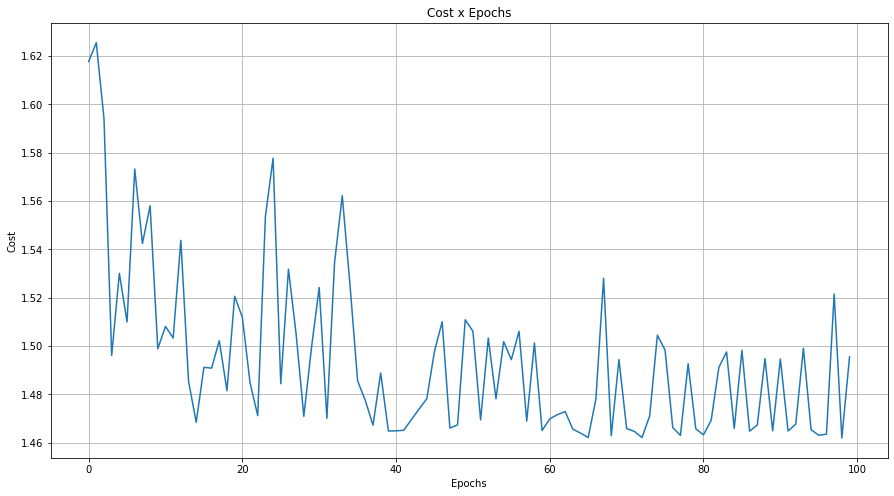

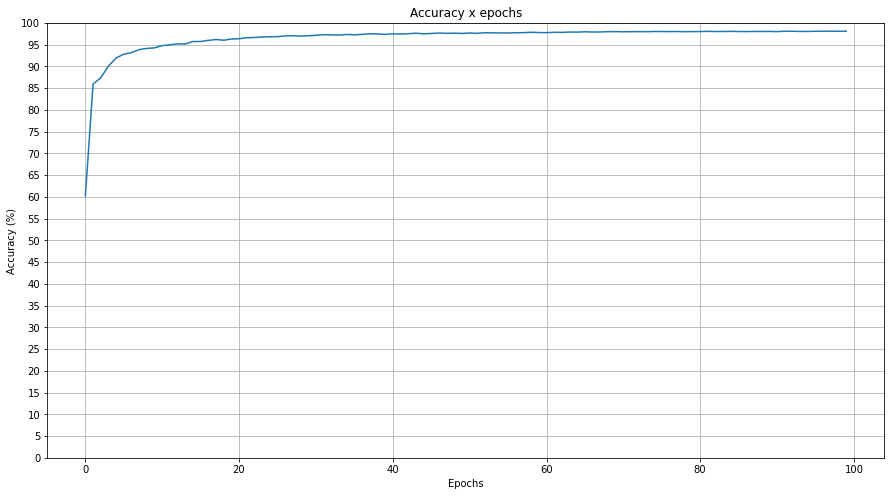

In [23]:
# Plota as funções de custo e acurácia

plt.figure(figsize=(15,8))
plt.plot(costs)
plt.title('Cost x Epochs')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

plt.figure(figsize=(15,8))
plt.plot(accs)
plt.yticks(range(0,101,5))
plt.title('Accuracy x epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()


Veremos agora como essas duas curvas se comportam ao alterarmos o valor do *learning rate*. Treinaremos a rede agora com diferentes valores de `lr`: `lr=0.005`, `lr=0.015`, `lr=15` e `lr=50`.

In [24]:
# Treina diferentes modelos utilizando diferentes taxas de aprendizado

costs_lr0005, accs_lr0005 = training(NN=NeuralNetwork(), dataloader=dataloader, criterion=criterion, lr = 0.005)
costs_lr0015, accs_lr0015 = training(NN=NeuralNetwork(), dataloader=dataloader, criterion=criterion, lr = 0.015)
costs_lr15, accs_lr15 = training(NN=NeuralNetwork(), dataloader=dataloader, criterion=criterion, lr = 15)
costs_lr50, accs_lr50 = training(NN=NeuralNetwork(), dataloader=dataloader, criterion=criterion, lr = 50)

epoch [1/100], cost:2.3103
epoch [2/100], cost:2.3012
epoch [3/100], cost:2.2969
epoch [4/100], cost:2.2893
epoch [5/100], cost:2.2848
epoch [6/100], cost:2.2710
epoch [7/100], cost:2.2537
epoch [8/100], cost:2.2393
epoch [9/100], cost:2.2387
epoch [10/100], cost:2.2138
epoch [11/100], cost:2.1921
epoch [12/100], cost:2.1804
epoch [13/100], cost:2.1544
epoch [14/100], cost:2.1443
epoch [15/100], cost:2.1329
epoch [16/100], cost:2.0615
epoch [17/100], cost:2.0844
epoch [18/100], cost:2.0403
epoch [19/100], cost:2.0439
epoch [20/100], cost:1.9782
epoch [21/100], cost:1.9798
epoch [22/100], cost:1.9566
epoch [23/100], cost:1.9628
epoch [24/100], cost:1.9513
epoch [25/100], cost:1.9333
epoch [26/100], cost:1.8812
epoch [27/100], cost:1.8946
epoch [28/100], cost:1.8868
epoch [29/100], cost:1.8723
epoch [30/100], cost:1.8273
epoch [31/100], cost:1.8417
epoch [32/100], cost:1.8597
epoch [33/100], cost:1.8185
epoch [34/100], cost:1.8374
epoch [35/100], cost:1.8553
epoch [36/100], cost:1.7800
e

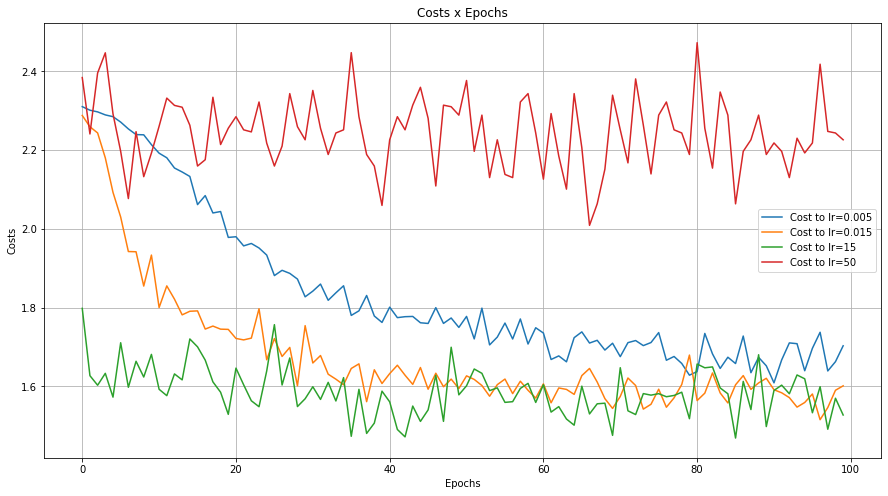

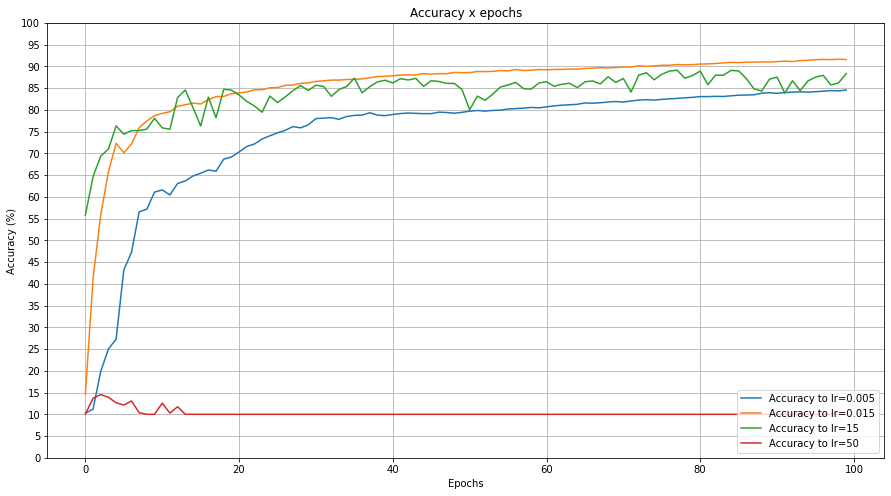

In [25]:
# Plota os custos e as acurácias do diferentes modelos treinados

plt.figure(figsize=(15,8))
plt.plot(costs_lr0005, label='Cost to lr=0.005')
plt.plot(costs_lr0015, label='Cost to lr=0.015')
plt.plot(costs_lr15, label='Cost to lr=15')
plt.plot(costs_lr50, label='Cost to lr=50')
plt.title('Costs x Epochs')
plt.xlabel('Epochs')
plt.ylabel('Costs')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(15,8))
plt.plot(accs_lr0005, label='Accuracy to lr=0.005')
plt.plot(accs_lr0015, label='Accuracy to lr=0.015')
plt.plot(accs_lr15, label='Accuracy to lr=15')
plt.plot(accs_lr50, label='Accuracy to lr=50')
plt.yticks(range(0,101,5))
plt.title('Accuracy x epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Veja como o algoritmo nos dois casos em que `lr` é muito pequeno convergem, mas lentamente, de forma que após as 100 épocas, a acurácia ainda não passou dos 95%.

Para `lr=15` o algoritmo converge, mas, analisando a forma das duas curvas (custo e acurácia), parece estar no limiar entre a convergência e a divergência. Apesar de a sua função de perda ficar em um valor aceitável ao final das 100 épocas, a acurácia deixa claro que o seu desempenho é pior do que para `lr=0.5`, uma vez que esta não ultrapassa o valor de 90%.  

Por outro lado, para `lr=50` o algoritmo não converge. É interessante perceber o comportamento da curva da acurácia deste modelo. Com a divergência, o algoritmo não consegue melhorar os seus parâmetros e, assim, é como se ele tentasse adivinhar os labels de forma aleatória. Nesse caso, como os dados são divididos em 10 classes equiprováveis, é esperado que o valor de acurácia seja aproximadamente 10%, e é exatamente isso que acontece durante todas as épocas.


## 5. Sugestões<a class="anchor" name="section_5"></a>
É preciso lembrar que o estudo em Machine Learning deve ser constante, por isso, sugerimos ao leitor que não se atenha apenas ao conteúdo trazido nesse notebook e procure sempre novas fontes de informação. Como indicação de material, sugerimos a leitura das referências indicadas na seção abaixo. Essas referências trazem o conteúdo aprensentado no notebook de forma mais aprofundada.

Neste momento, faremos algumas sugestões para estender o entendimento do leitor e aprofundar o conhecimento acerca do tema abordado neste notebook, assim como se segue:

  1. Procure a documentação das bibliotecas comumente utilizadas em Machine Learning, como **matplotlib**, **numpy** e principalmente a **pytorch** e estude suas implementações.
  2. Sugerimos que o leitor tente entender verdadeiamente o que está acontecendo nos códigos apresentados e não apenas os executem de forma automática. 
  3. Alguns termos/variáveis nas seções 3 e 4 talvez não fiquem tão claras de imediado, eles serão aprofundados nos próximos módulos. Mas é interessante que o leitor já desenvolva uma proatividade de estudos e pesquise acerca desses termos desconhecidos.
  4. Para um estudo maior acerca do overfitting e underfitting, aconselha-se que o leitor treine a rede para diferentes valores de learning rate (*lr*) na seção 4.3, visualize o gráfico de acurácia e erro gerado e procure entender qual a influência direta desse parâmetro.
  5. Outras variáveis como *bacth_size* e *num_epochs*, da seção 4.2 e 4.3, respectivamente, também podem ser variadas de forma a estudar melhor sua influência na acurácia e erro do modelo.


## 6. Referências<a class="anchor" name="section_6"></a>

- [IBM - What are Neural Networks?](https://www.ibm.com/cloud/learn/neural-networks)
- [A Beginner's Guide to Neural Networks and Deep Learning](https://wiki.pathmind.com/neural-network)
- [ML | Underfitting and Overfitting](https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/)
- [Data Science Foundation - Underfitting and Overfitting in Machine Learning](https://datascience.foundation/sciencewhitepaper/underfitting-and-overfitting-in-machine-learning)
- [About Train, Validation and Test Sets in Machine Learning](https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7)